In [0]:
from google.colab import drive
drive.mount('/content/gdrive/')

In [112]:
import h5py
import numpy as np
import math
import pandas as pd

import tensorflow as tf
from tensorflow.keras.layers import Dense, Activation,BatchNormalization, Dropout
from tensorflow.keras import optimizers,regularizers
from tensorflow.keras.models import Sequential

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
mainPath = '/content/gdrive/My Drive/AIML/SVHN_image_clf/'

In [0]:
def loadData(fileName):
  data = h5py.File(mainPath+fileName,'r')
  print(list(data.keys()))
  X_train = data['X_train'][:]
  y_train = data['y_train'][:]
  X_test = data['X_test'][:]
  y_test = data['y_test'][:]
  X_val = data['X_val'][:]
  y_val = data['y_val'][:]
  data.close()
  return (X_train,X_test,y_train,y_test,X_val,y_val)

In [7]:
X_train,X_test,y_train,y_test,X_val,y_val = loadData('SVHN_single_grey.h5')

['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']


Label 0


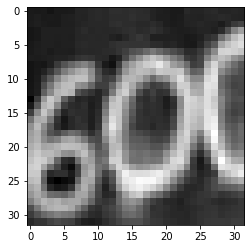

In [6]:
# Let's visualize the data
print(f"Label {y_train[18000]}")
plt.imshow(X_train[18000],cmap='gray')

In [8]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
print(X_val.shape, y_val.shape)

(42000, 32, 32) (42000,)
(18000, 32, 32) (18000,)
(60000, 32, 32) (60000,)


In [9]:
# Reshape features.
X_train = X_train.reshape((X_train.shape[0],X_train.shape[1]*X_train.shape[2]))
X_test = X_test.reshape((X_test.shape[0],X_test.shape[1]*X_test.shape[2]))
print(X_train.shape,X_test.shape)

(42000, 1024) (18000, 1024)


In [0]:
# Normalize features.
X_train = X_train/255.0
X_test = X_test/255.0

In [11]:
# One-hot encode the target
print(np.unique(y_train))
print(np.unique(y_test))
y_train = tf.keras.utils.to_categorical(y_train,num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test,num_classes=10)

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


In [12]:
print(y_test[2])

[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


In [0]:
# Create basic model and check the accuracy and loss.

def prepapreBasicModel(epochs, lr,lVal,X_train,y_train):

  hidden_nodes = 256
  output_nodes = 10
  input_shape = X_train.shape[1]

  model = Sequential()
  model.add(Dense(hidden_nodes,input_shape = (input_shape,)))
  model.add(Activation('relu'))
  model.add(Dense(hidden_nodes))
  model.add(Activation('relu'))
  model.add(Dense(output_nodes,kernel_regularizer=regularizers.l2(lVal)))
  model.add(Activation('softmax'))

  sgd = optimizers.Adam(lr)
  # optimizers.SGD(learning_rate=lr,momentum=0.9)
  # complie model
  model.compile(loss='categorical_crossentropy',optimizer=sgd,metrics=['accuracy'])

  #Model summary
  model.summary()

  #Fit model
  model.fit(X_train,y_train,epochs=epochs,batch_size=1000,verbose=True)
  print(f'Learning Rate: {lr} ')
  print(f'Lambda: {lVal}')

In [40]:
lr = 0.001
Lambda = 0
prepapreBasicModel(1,lr,Lambda,X_train,y_train)
# As we can see , the accuracy is almost 10.

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 256)               262400    
_________________________________________________________________
activation_20 (Activation)   (None, 256)               0         
_________________________________________________________________
dense_21 (Dense)             (None, 256)               65792     
_________________________________________________________________
activation_21 (Activation)   (None, 256)               0         
_________________________________________________________________
dense_22 (Dense)             (None, 10)                2570      
_________________________________________________________________
activation_22 (Activation)   (None, 10)                0         
Total params: 330,762
Trainable params: 330,762
Non-trainable params: 0
________________________________________________

In [41]:
# Let's try increasing the Lambda value, and check for increase in loss.
lr = 0.001
Lambda = 1e3
prepapreBasicModel(1,lr,Lambda,X_train,y_train)
# yes, there is a increase in loss.

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_23 (Dense)             (None, 256)               262400    
_________________________________________________________________
activation_23 (Activation)   (None, 256)               0         
_________________________________________________________________
dense_24 (Dense)             (None, 256)               65792     
_________________________________________________________________
activation_24 (Activation)   (None, 256)               0         
_________________________________________________________________
dense_25 (Dense)             (None, 10)                2570      
_________________________________________________________________
activation_25 (Activation)   (None, 10)                0         
Total params: 330,762
Trainable params: 330,762
Non-trainable params: 0
________________________________________________

In [42]:
#Now, let's overfit the model by taking subset data from original data.
X_train_subset = X_train[0:20]
y_train_subset = y_train[0:20]
print(X_train_subset.shape,y_train_subset.shape)

(20, 1024) (20, 10)


In [43]:
lr = 0.001
Lambda = 0
prepapreBasicModel(500,lr,Lambda,X_train_subset,y_train_subset)
# as we can see the model is overfitting.

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_26 (Dense)             (None, 256)               262400    
_________________________________________________________________
activation_26 (Activation)   (None, 256)               0         
_________________________________________________________________
dense_27 (Dense)             (None, 256)               65792     
_________________________________________________________________
activation_27 (Activation)   (None, 256)               0         
_________________________________________________________________
dense_28 (Dense)             (None, 10)                2570      
_________________________________________________________________
activation_28 (Activation)   (None, 10)                0         
Total params: 330,762
Trainable params: 330,762
Non-trainable params: 0
________________________________________________

In [0]:
# We checked initial loss
# We observed increase in loss by changing learning rate.
# And we checked model is overfitting on subset of training data. 
# We can say that, our base model is ready.

In [0]:
# Now let's build our upgraded model based on previous model.
# We considred that our previous model as our base model. Because we tested , base loss and overfitting.

In [47]:
# Try to figure out Lmabda and LearningRate.
# We start with smalledt values.
# We will use our basic model.
learningRate = 1e-7
Lambda = 1e-7
prepapreBasicModel(50,learningRate,Lambda,X_train,y_train)

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_32 (Dense)             (None, 256)               262400    
_________________________________________________________________
activation_32 (Activation)   (None, 256)               0         
_________________________________________________________________
dense_33 (Dense)             (None, 256)               65792     
_________________________________________________________________
activation_33 (Activation)   (None, 256)               0         
_________________________________________________________________
dense_34 (Dense)             (None, 10)                2570      
_________________________________________________________________
activation_34 (Activation)   (None, 10)                0         
Total params: 330,762
Trainable params: 330,762
Non-trainable params: 0
_______________________________________________

In [51]:
# As we can see there is no big change in loss and accuracy.
# That tells us that "LearningRate" is very low.
# Now let's by increasing "LearningRate" and keep "Lambda" as it was.
learningRate = 1e8
Lambda = 1e-7
prepapreBasicModel(50,learningRate,Lambda,X_train,y_train)

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_44 (Dense)             (None, 256)               262400    
_________________________________________________________________
activation_44 (Activation)   (None, 256)               0         
_________________________________________________________________
dense_45 (Dense)             (None, 256)               65792     
_________________________________________________________________
activation_45 (Activation)   (None, 256)               0         
_________________________________________________________________
dense_46 (Dense)             (None, 10)                2570      
_________________________________________________________________
activation_46 (Activation)   (None, 10)                0         
Total params: 330,762
Trainable params: 330,762
Non-trainable params: 0
_______________________________________________

In [0]:
def prepapreUpdatedModel(epochs,learningRate,lVal,X_train,y_train,X_test,y_test):
  hidden_nodes = 256
  output_nodes = 10
  input_shape = X_train.shape[1]

  model = Sequential()
  model.add(Dense(hidden_nodes,input_shape = (input_shape,)))
  model.add(Activation('relu'))
  model.add(Dense(hidden_nodes))
  model.add(Activation('relu'))
  model.add(Dense(output_nodes,kernel_regularizer=regularizers.l2(lVal)))
  model.add(Activation('softmax'))

  sgd = optimizers.Adam(learning_rate=learningRate)
  # optimizers.SGD(learning_rate=learningRate,momentum=0.9)
  # complie model
  model.compile(loss='categorical_crossentropy',optimizer=sgd,metrics=['accuracy'])

  #Model summary
  model.summary()

  #Fit model
  model.fit(X_train,y_train,epochs=epochs,batch_size=100,verbose=True)
  score = model.evaluate(X_test,y_test,verbose=False)
  print(f'Learning Rate: {learningRate}  and Lambda: {lVal} and score: {score}')
  

In [53]:
# See loss is exploding. That shows us "LearningRate" is very high.
# And we can say that the we got "LearningRate", that would be between "lowest=1e-7" and "Heighest=1e-4"

for val in range(1,10):
  epochs = 100
  lr = math.pow(10,np.random.uniform(-7,8))
  Lambda = math.pow(10,np.random.uniform(-7,-2))
  print(f"Counter: {val}/{str(10)}")
  prepapreUpdatedModel(epochs,lr,Lambda,X_train,y_train,X_test,y_test)

Counter: 1/10
Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_47 (Dense)             (None, 256)               262400    
_________________________________________________________________
activation_47 (Activation)   (None, 256)               0         
_________________________________________________________________
dense_48 (Dense)             (None, 256)               65792     
_________________________________________________________________
activation_48 (Activation)   (None, 256)               0         
_________________________________________________________________
dense_49 (Dense)             (None, 10)                2570      
_________________________________________________________________
activation_49 (Activation)   (None, 10)                0         
Total params: 330,762
Trainable params: 330,762
Non-trainable params: 0
_________________________________

In [54]:
# As we can see 4 and 5 model giving us good accuracy.             8: 3e-4, 1e-3, 
# We'll run one more time to finer learningRate and Lambda values
for val in range(1,5):
  epochs = 100
  lr = math.pow(10,np.random.uniform(-5,-3))
  Lambda = math.pow(10,np.random.uniform(-6,-2))
  print(f"Counter: {val}/{str(10)}")
  prepapreUpdatedModel(epochs,lr,Lambda,X_train,y_train,X_test,y_test)

Counter: 1/10
Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_74 (Dense)             (None, 256)               262400    
_________________________________________________________________
activation_74 (Activation)   (None, 256)               0         
_________________________________________________________________
dense_75 (Dense)             (None, 256)               65792     
_________________________________________________________________
activation_75 (Activation)   (None, 256)               0         
_________________________________________________________________
dense_76 (Dense)             (None, 10)                2570      
_________________________________________________________________
activation_76 (Activation)   (None, 10)                0         
Total params: 330,762
Trainable params: 330,762
Non-trainable params: 0
_________________________________

In [0]:
def prepapreWeighteddModel(epochs,learningRate,lVal,X_train,y_train,X_test,y_test):
  hidden_nodes = 256
  output_nodes = 10
  input_shape = X_train.shape[1]

  model = Sequential()
  model.add(Dense(hidden_nodes,input_shape = (input_shape,),kernel_initializer='uniform'))
  model.add(Activation('relu'))
  model.add(Dense(hidden_nodes,kernel_initializer='uniform'))
  model.add(Activation('relu'))
  model.add(Dense(output_nodes,kernel_regularizer=regularizers.l2(lVal)))
  model.add(Activation('softmax'))

  sgd = optimizers.Adam(learning_rate=learningRate)
  # optimizers.SGD(learning_rate=learningRate,momentum=0.9)
  # complie model
  model.compile(loss='categorical_crossentropy',optimizer=sgd,metrics=['accuracy'])

  #Model summary
  model.summary()

  #Fit model
  model.fit(X_train,y_train,epochs=epochs,batch_size=100,verbose=True)
  score = model.evaluate(X_test,y_test,verbose=False)
  print(f'Learning Rate: {learningRate}  and Lambda: {lVal} and score: {score}')

In [58]:
# By looking at model performance, we choose LearningRate and Lambda as following.
LearningRate = 1e-4
Lambda = 1e-4
epochs = 100
weighted_model = prepapreWeighteddModel(epochs,LearningRate,Lambda,X_train,y_train,X_test,y_test)

Model: "sequential_29"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_89 (Dense)             (None, 256)               262400    
_________________________________________________________________
activation_89 (Activation)   (None, 256)               0         
_________________________________________________________________
dense_90 (Dense)             (None, 256)               65792     
_________________________________________________________________
activation_90 (Activation)   (None, 256)               0         
_________________________________________________________________
dense_91 (Dense)             (None, 10)                2570      
_________________________________________________________________
activation_91 (Activation)   (None, 10)                0         
Total params: 330,762
Trainable params: 330,762
Non-trainable params: 0
_______________________________________________

In [0]:
# And We got our model with learning and Lambda values and accuracy of 83%
# And weight is initialized with "uniform".

In [0]:
# Lets' build model with BatchNormalization
def prepapreBatchNormaldModel(epochs,learningRate,lVal,X_train,y_train,X_test,y_test):
  hidden_nodes = 256
  hidden_nodes_2 = 128
  output_nodes = 10
  input_shape = X_train.shape[1]

  model = Sequential()
  model.add(Dense(hidden_nodes,input_shape = (input_shape,),kernel_initializer='uniform'))
  model.add(BatchNormalization())
  model.add(Activation('relu'))
  model.add(Dropout(0.5))
  model.add(Dense(hidden_nodes_2,kernel_initializer='uniform'))
  model.add(BatchNormalization())
  model.add(Activation('relu'))
  model.add(Dropout(0.5))
  model.add(Dense(hidden_nodes_2,kernel_initializer='uniform'))
  model.add(BatchNormalization())
  model.add(Activation('relu'))
  model.add(Dense(output_nodes,kernel_regularizer=regularizers.l2(lVal)))
  model.add(Activation('softmax'))

  sgd = optimizers.Adam(learning_rate=learningRate)
  # SGD(learning_rate=learningRate,momentum=0.9)
  # complie model
  model.compile(loss='categorical_crossentropy',optimizer=sgd,metrics=['accuracy'])

  #Model summary
  model.summary()

  #Fit model
  history = model.fit(X_train,y_train,epochs=epochs,batch_size=100,verbose=True,validation_data=(X_test,y_test))
  score = model.evaluate(X_test,y_test,verbose=False)
  print(f'Learning Rate: {learningRate}  and Lambda: {lVal} and score: {score}')
  return (model,history)

In [70]:
LearningRate = 1e-4
Lambda = 1e-4
epochs = 200
model,history = prepapreBatchNormaldModel(epochs,LearningRate, Lambda,X_train,y_train,X_test,y_test)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 256)               262400    
_________________________________________________________________
batch_normalization_3 (Batch (None, 256)               1024      
_________________________________________________________________
activation_4 (Activation)    (None, 256)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 128)               32896     
_________________________________________________________________
batch_normalization_4 (Batch (None, 128)               512       
_________________________________________________________________
activation_5 (Activation)    (None, 128)              

In [0]:
# Save model weights and model as well.
model.save('P1_model.h5')
model.save_weights('P1_weights.h5')

In [83]:
# By seeing the baove result, we can say model is not overfitting.
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

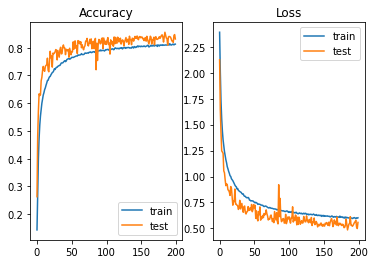

In [102]:
fig,ax = plt.subplots(1,2)
ax[0].set_title('Accuracy')
ax[0].plot(history.history['accuracy'],label='train')
ax[0].plot(history.history['val_accuracy'],label='test')
ax[0].legend()

ax[1].set_title('Loss')
ax[1].plot(history.history['loss'],label='train')
ax[1].plot(history.history['val_loss'],label='test')
ax[1].legend()
# By checking the accuracy and loss plots, suggest that the model has good fit on the problem.

In [0]:
# Let's check classification report and multilabel_confusion_matrix
from sklearn.metrics import classification_report, multilabel_confusion_matrix,confusion_matrix

In [0]:
def classificationReport(y_true,y_pred):
    target_names = [f"Class {i}" for i in range(10) ]
    print(classification_report(y_true,y_pred,target_names=target_names))

In [0]:
preds = model.predict_classes(X_test)

In [89]:
pred = tf.keras.utils.to_categorical(preds,num_classes=10)
classificationReport(y_test,pred)
multilabel_confusion_matrix(y_test,pred)

              precision    recall  f1-score   support

     Class 0       0.95      0.79      0.86      1814
     Class 1       0.90      0.78      0.84      1828
     Class 2       0.85      0.86      0.86      1803
     Class 3       0.78      0.80      0.79      1719
     Class 4       0.72      0.93      0.81      1812
     Class 5       0.78      0.86      0.82      1768
     Class 6       0.85      0.81      0.83      1832
     Class 7       0.90      0.85      0.88      1808
     Class 8       0.85      0.79      0.82      1812
     Class 9       0.79      0.84      0.82      1804

   micro avg       0.83      0.83      0.83     18000
   macro avg       0.84      0.83      0.83     18000
weighted avg       0.84      0.83      0.83     18000
 samples avg       0.83      0.83      0.83     18000



array([[[16103,    83],
        [  385,  1429]],

       [[16023,   149],
        [  411,  1417]],

       [[15930,   267],
        [  244,  1559]],

       [[15888,   393],
        [  338,  1381]],

       [[15551,   637],
        [  133,  1679]],

       [[15814,   418],
        [  254,  1514]],

       [[15897,   271],
        [  346,  1486]],

       [[16019,   173],
        [  265,  1543]],

       [[15940,   248],
        [  377,  1435]],

       [[15800,   396],
        [  282,  1522]]])

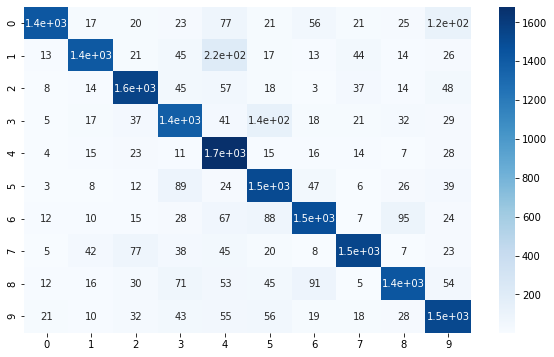

In [118]:
cm = confusion_matrix(y_test.argmax(axis=1),pred.argmax(axis=1))
cm_df = pd.DataFrame(cm,index=[i for i in '0123456789'], columns= [i for i in '0123456789'])
plt.figure(figsize=(10,6))
sns.heatmap(cm_df,annot=True,cmap='Blues')

In [0]:
# As we can see F1-score is also near to one.
# class 3 f1-score is under .8.
# Over all the model performance is good.